In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as st
import pandas as pd
import os, json

COMBINATION2_RESULTS_CSV = os.path.join(
    "results", 
    "200-nodes-50-endpoints-20-subnets-3-layers-250000-time.csv"
)

COMBINATION3_RESULTS_CSV = os.path.join(
    "results",
    "3-combination-200-nodes-50-endpoints-20-subnets-3-layers-250000-time.csv"
)

combination3_results = pd.read_csv(COMBINATION3_RESULTS_CSV)

In [3]:
t_min = 10
t_max = 200
t_delta = t_max - t_min
ac = 0.2

In [4]:
f_attempts = [i for i in range(21)]
t_eachtrial_v = [t_min + (t_delta * (1 - ac))/(f+1) for f in f_attempts]
t_v = [sum(t_eachtrial_v[:i+1]) for i in range(len(t_eachtrial_v))]
p_v = [(1-ac)**(f)*ac for f in f_attempts]
P_v = [1 - (1- ac)**(f+1) for f in f_attempts]

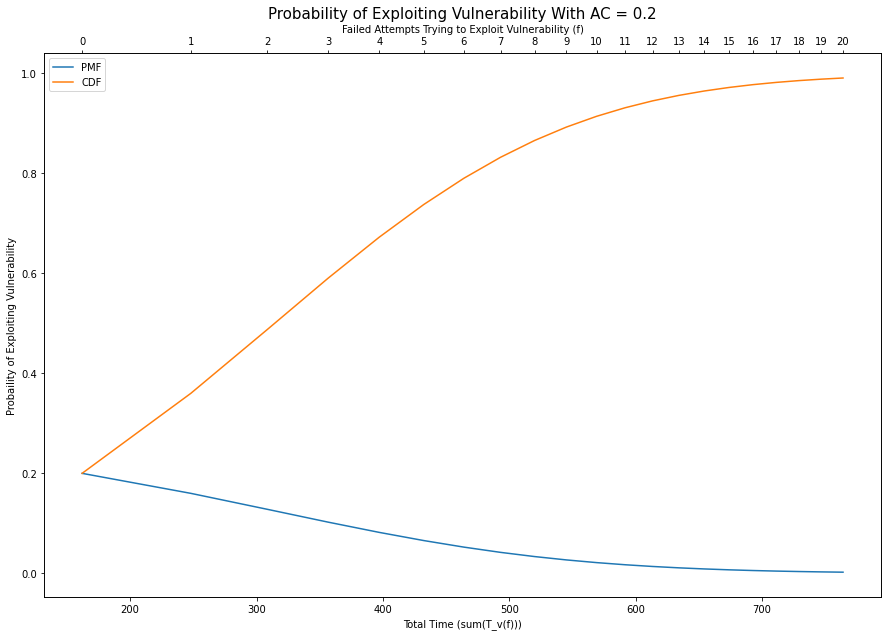

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(t_v, p_v)
ax.plot(t_v, P_v)

ax2 = ax.twiny()
ax2.set_xticks(t_v)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(f_attempts)
ax2.set_xlabel("Failed Attempts Trying to Exploit Vulnerability (f)")

ax.set_title("Probability of Exploiting Vulnerability With AC = {}".format(ac), fontsize=15)
ax.set_xlabel("Total Time (sum(T_v(f)))")
ax.set_ylabel("Probaility of Exploiting Vulnerability")
ax.legend(["PMF", "CDF"])
plt.show()

In [6]:
ac_values = np.arange(0.01, 1.0, 0.01)

In [7]:
ac_values

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [8]:
expected_f = np.rint(np.subtract(np.log(0.1)/np.log(np.subtract(1, ac_values)), 1))
expected_f[expected_f < 0] = 0

In [9]:
expected_f

array([228., 113.,  75.,  55.,  44.,  36.,  31.,  27.,  23.,  21.,  19.,
        17.,  16.,  14.,  13.,  12.,  11.,  11.,  10.,   9.,   9.,   8.,
         8.,   7.,   7.,   7.,   6.,   6.,   6.,   5.,   5.,   5.,   5.,
         5.,   4.,   4.,   4.,   4.,   4.,   4.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   3.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.])

In [10]:
def get_expected_t(acs, fs):
    expected_t = []
    for ac, f_m in zip(acs, fs):
        t_e_v = [t_min + (t_delta * (1 - ac))/(f+1) for f in range(int(f_m)+1)]
        expected_t.append(sum(t_e_v))
        
    return np.array(expected_t)

expected_t = get_expected_t(ac_values, expected_f)

In [11]:
expected_t

array([3421.06777522, 2130.17318061, 1665.74484271, 1401.13201031,
       1243.28813486, 1120.40329957, 1037.13610103,  966.46949761,
        892.86316893,  851.12906579,  808.37777602,  764.38207067,
        738.55803199,  692.19861749,  665.12731574,  637.54934732,
        609.37632395,  603.48022367,  574.75912338,  545.2031746 ,
        539.63813492,  509.25309524,  503.87805556,  472.45857143,
        467.29464286,  462.13071429,  429.62928571,  424.70285714,
        419.77642857,  385.85      ,  381.195     ,  376.54      ,
        371.885     ,  367.23      ,  331.99166667,  327.65333333,
        323.315     ,  318.97666667,  314.63833333,  310.3       ,
        273.54166667,  269.58333333,  265.625     ,  261.66666667,
        257.70833333,  253.75      ,  249.79166667,  245.83333333,
        207.65      ,  204.16666667,  200.68333333,  197.2       ,
        193.71666667,  190.23333333,  186.75      ,  183.26666667,
        179.78333333,  176.3       ,  172.81666667,  169.33333

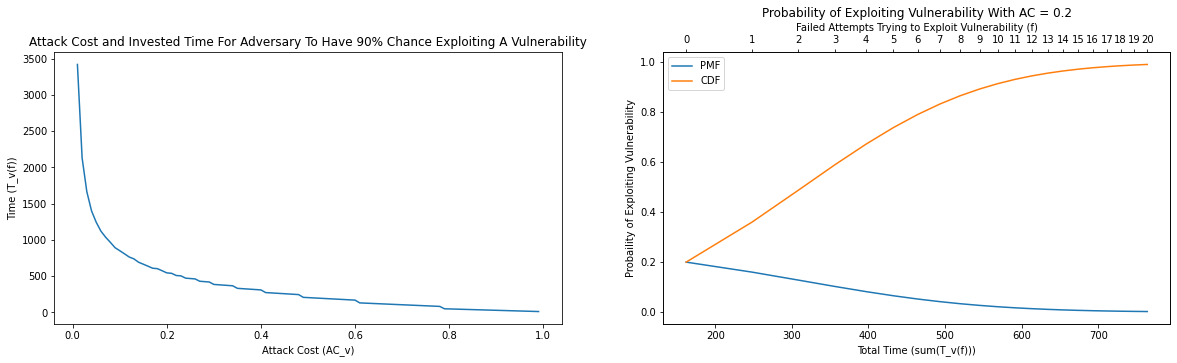

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
ax = axes[0]
ax.plot(ac_values, expected_t)
ax.set_title("Attack Cost and Invested Time For Adversary To Have 90% Chance Exploiting A Vulnerability")
ax.set_xlabel("Attack Cost (AC_v)")
ax.set_ylabel("Time (T_v(f))")

ax = axes[1]
ax.plot(t_v, p_v)
ax.plot(t_v, P_v)

ax2 = ax.twiny()
ax2.set_xticks(t_v)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticklabels(f_attempts)
ax2.set_xlabel("Failed Attempts Trying to Exploit Vulnerability (f)")

ax.set_title("Probability of Exploiting Vulnerability With AC = {}".format(ac))
ax.set_xlabel("Total Time (sum(T_v(f)))")
ax.set_ylabel("Probaility of Exploiting Vulnerability")
ax.legend(["PMF", "CDF"])
plt.show()

In [13]:
avg_no_mtd = np.load("results/avg_no_mtd.npy")
avg_no_mtd

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.49997e+05,
        2.49998e+05, 2.49999e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.46000e+01,
        1.46000e+01, 1.46000e+01]])

In [14]:
def log_model(time, a, b):
    return a*np.log(b*time + 1)

In [15]:
parameters, covariance = curve_fit(log_model, avg_no_mtd[0,:], avg_no_mtd[1,:])

<ipython-input-14-0aeca2d82696>:2: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*time + 1)


In [16]:
parameters

array([9.41997272e+00, 1.47224069e-05])

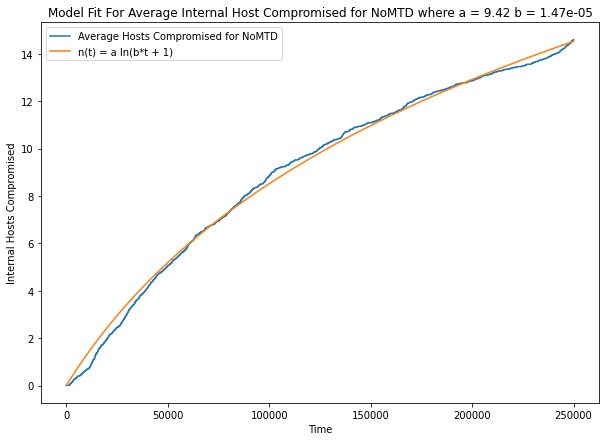

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(avg_no_mtd[0,:], avg_no_mtd[1,:])
ax.plot(avg_no_mtd[0,:], log_model(avg_no_mtd[0,:], 9.42, 1.47e-05))
ax.legend(["Average Hosts Compromised for NoMTD", "n(t) = a ln(b*t + 1)"])
ax.set_xlabel("Time")
ax.set_ylabel("Internal Hosts Compromised")
ax.set_title("Model Fit For Average Internal Host Compromised for NoMTD where a = {} b = {}".format(9.42, 1.47e-05))
plt.show()

In [18]:
covariance

array([[ 1.65832066e-05, -4.41781971e-11],
       [-4.41781971e-11,  1.19243834e-16]])

In [19]:
SE = np.sqrt(np.diag(covariance))

In [20]:
SE

array([4.07224835e-03, 1.09198825e-08])

In [21]:
import random

def mean_mtd_rate(trials):
    return np.mean([random.randint(1000,5000) for _i in range(trials)])

In [22]:
mean_mtd_rate(100000)

2993.5285

In [23]:
portshuffle = np.load("results/avg_portshuffle.npy")
ipshuffle = np.load("results/avg_ipshuffle.npy")
completetopologyshuffle = np.load("results/avg_completetopologyshuffle.npy")
hosttopologyshuffle = np.load("results/avg_hosttopologyshuffle.npy")
serviceshuffle = np.load("results/avg_serviceshuffle.npy")
osshuffle = np.load("results/avg_osshuffle.npy")

In [24]:
portshuffle

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.49997e+05,
        2.49998e+05, 2.49999e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.30000e+01,
        1.30000e+01, 1.30000e+01]])

In [25]:
# df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    
#     df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
#     df_mtd_host_compromises = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total events"].to_numpy()
    
#     x_ratio_blocked = []
#     y_hosts_compromised = []
#     mtd_types_seen = []
    
#     for index, mtd_strats_events in enumerate(df_mtd_events):
#         total_blocked_events = 0
#         total_compare_mtd_events = 0
        
#         for mtd_strat_results in mtd_strats_events:
#             mtd_type = mtd_strat_results["record name"]
#             if not mtd_type in mtd_types_seen:
#                 mtd_types_seen.append(mtd_type)
                
#             if mtd_type == compare_ratio_strat:
#                 total_compare_mtd_events += mtd_strat_results["total blocks"]

In [26]:
combination2_results = pd.read_csv(COMBINATION2_RESULTS_CSV)

In [27]:
def parse_json_column_to_dataframe(df, column_name):
    column_str_list = df[column_name].to_list()
    df_list = []
    
    for row_str in column_str_list:
        try:
            df_list.append(json.loads(row_str.replace("'", '"')))
        except Exception as e:
            print("ERROR WITH JSON DOCUMENT!")
            print(row_str)
            print(e)
    
    return pd.DataFrame(df_list)

def get_average_blocks(df, mtd_strat, time):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
    
    blocks = []
    for index, mtd_strats_events in enumerate(df_mtd_events):
        for mtd_strat_results in mtd_strats_events:
            blocked_times = mtd_strat_results["blocked times"]
            total_blocks = 0
            for t in blocked_times:
                if t <= time:
                    total_blocks += 1
                else:
                    break
            blocks.append(total_blocks)
            
    return np.mean(blocks)

def get_total_average_blocks(df, mtd_strat, combined_mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == combined_mtd_strat]
    df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
    
    blocks = []
    for index, mtd_strats_events in enumerate(df_mtd_events):
        for mtd_strat_results in mtd_strats_events:
            if mtd_strat_results["record name"] == mtd_strat:
                blocks.append(mtd_strat_results["total blocks"])
    return np.mean(blocks)

def get_total_average_mtd_triggers(df, mtd_strat, combined_mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == combined_mtd_strat]
    df_mtd_events = parse_json_column_to_dataframe(df_mtd, "MTD Statistics").to_numpy()
    
    triggers = []
    for index, mtd_strats_events in enumerate(df_mtd_events):
        for mtd_strat_results in mtd_strats_events:
            if mtd_strat_results["record name"] == mtd_strat:
                triggers.append(mtd_strat_results["total events"])
    return np.mean(triggers)
    
ipshuffle_b_mean = get_average_blocks(combination2_results, "IPShuffle", 2499999)
portshuffle_b_mean = get_average_blocks(combination2_results, "PortShuffle", 2499999)

get_total_average_blocks(combination2_results, "IPShuffle", "IPShuffle")
get_total_average_mtd_triggers(combination2_results, "IPShuffle", "IPShuffle")

83.16

In [28]:
def get_penalty(b):
    if b > 75:
        b = 75
        
    return 1000*(1 - 0.9*b/75)

def get_mean_penalty(mean_blocks):
    penalty = [get_penalty(b) for b in range(int(np.ceil(mean_blocks)))]
    return sum(penalty)


In [29]:
ipshuffle_p_mean = get_mean_penalty(ipshuffle_b_mean)
portshuffle_p_mean = get_mean_penalty(portshuffle_b_mean)

In [30]:
# def log_model(time, a, b):
#     return a*np.log(b*time + 1)
# parameters, covariance = curve_fit(log_model, avg_no_mtd[0,:], avg_no_mtd[1,:])

n_tmax = log_model(avg_no_mtd[0,:], 9.42, 1.47e-05)[-1]
e_host_discovery = (n_tmax - ipshuffle[1,:][-1])/ipshuffle_b_mean
e_port_scan = (n_tmax - portshuffle[1,:][-1])/portshuffle_b_mean

In [31]:
ipshuffle_params = {
    "name" : "IPShuffle",
    "n_m" : 0,
    "e" : e_host_discovery,
    "avg_time_series" : ipshuffle[1,:]
}

portshuffle_params = {
    "name" : "PortShuffle",
    "n_m" : 0,
    "e" : e_port_scan,
    "avg_time_series" : portshuffle[1,:]
}

print("Host Discovery Effectiveness:", e_host_discovery)
print("Port Re-Scan Effectiveness:", e_port_scan)

Host Discovery Effectiveness: 0.16740390224348387
Port Re-Scan Effectiveness: 0.04626799190985478


In [63]:
TOTAL_TIME = 250000
AVG_TIME_NEXT_CHANGE_1_STRAT = 3000

def predict_mean_internal_hosts_compromised(df, mtd_params, mtd_combination_test):
    total_strats = len(mtd_params)
    avg_time_to_next_change = AVG_TIME_NEXT_CHANGE_1_STRAT#*total_strats
    
    if avg_time_to_next_change >= TOTAL_TIME:
        avg_time_to_next_change = TOTAL_TIME - 1
    
    full_time = np.array([i for i in range(TOTAL_TIME)])
    n_t_values = log_model(full_time, 9.42, 1.47e-05)
    
    n_t_next = n_t_values[avg_time_to_next_change]
    
    new_vectors_factor = 0
    total_mtd_effectiveness = 0
    
    for mtd_param in mtd_params:
        b_m = get_total_average_blocks(df, mtd_param["name"], mtd_combination_test)
        t_m = get_total_average_mtd_triggers(df, mtd_param["name"], mtd_combination_test)
        
        new_vectors_factor += mtd_param["n_m"] * t_m * n_t_next
        total_mtd_effectiveness += b_m * mtd_param["e"]
        
    return new_vectors_factor + n_t_values[-1] - total_mtd_effectiveness
        
predict_mean_internal_hosts_compromised(combination2_results, [portshuffle_params], "PortShuffle")

13.0

In [64]:
def fit_n_m(df, mtd_strat_time_series, e_factor, name):
    b_m = get_total_average_blocks(df, name, name)
    h_m_expected = mtd_strat_time_series[1,:][-1]
    
    avg_time_to_next_change = AVG_TIME_NEXT_CHANGE_1_STRAT
    
    if avg_time_to_next_change >= TOTAL_TIME:
        avg_time_to_next_change = TOTAL_TIME - 1
    
    full_time = np.array([i for i in range(TOTAL_TIME)])
    n_t_values = log_model(full_time, 9.42, 1.47e-05)
    
    n_t_next = n_t_values[avg_time_to_next_change]
    
    t_m = get_total_average_mtd_triggers(df, name, name)
    
    n_m = (h_m_expected - n_t_values[-1] + b_m*e_factor)/(t_m*n_t_next)
    
    print("Name:", name, "Bm:", b_m, "Tm:", t_m, "Hm:", h_m_expected)
    
    params = {
        "name" : name,
        "n_m" : n_m,
        "e" : e_factor
    }
    return params

In [65]:
hosttopologyshuffle_params = fit_n_m(combination2_results, hosttopologyshuffle, e_host_discovery, "HostTopologyShuffle")
completetopologyshuffle_params = fit_n_m(combination2_results, completetopologyshuffle, e_host_discovery, "CompleteTopologyShuffle")
serviceshuffle_params = fit_n_m(combination2_results, serviceshuffle, e_port_scan, "ServiceShuffle")
osshuffle_params = fit_n_m(combination2_results, osshuffle, e_port_scan, "OSShuffle")

all_mtd_params = [
    ipshuffle_params,
    portshuffle_params,
    completetopologyshuffle_params,
    hosttopologyshuffle_params,
    serviceshuffle_params,
    osshuffle_params
]

all_mtd_params

Name: HostTopologyShuffle Bm: 71.07 Tm: 83.39 Hm: 48.71
Name: CompleteTopologyShuffle Bm: 72.88 Tm: 82.71 Hm: 30.23
Name: ServiceShuffle Bm: 43.06 Tm: 82.87 Hm: 36.39
Name: OSShuffle Bm: 48.69 Tm: 82.75 Hm: 35.48


[{'name': 'IPShuffle',
  'n_m': 0,
  'e': 0.16740390224348387,
  'avg_time_series': array([0.  , 0.  , 0.  , ..., 6.33, 6.33, 6.33])},
 {'name': 'PortShuffle',
  'n_m': 0,
  'e': 0.04626799190985478,
  'avg_time_series': array([ 0.,  0.,  0., ..., 13., 13., 13.])},
 {'name': 'CompleteTopologyShuffle',
  'n_m': 0.8298552260873144,
  'e': 0.16740390224348387},
 {'name': 'HostTopologyShuffle',
  'n_m': 1.359284078241005,
  'e': 0.16740390224348387},
 {'name': 'ServiceShuffle',
  'n_m': 0.7080905409781018,
  'e': 0.04626799190985478},
 {'name': 'OSShuffle', 'n_m': 0.6898095298762377, 'e': 0.04626799190985478}]

In [66]:
predict_mean_internal_hosts_compromised(combination2_results, [hosttopologyshuffle_params, serviceshuffle_params] , "HostTopologyShuffle,ServiceShuffle")

42.526387150009164

In [67]:
def confidence_interval_for_compromised_internal_hosts(df, mtd_strat, confidence):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    not_exposed_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
    return st.t.interval(confidence, len(not_exposed_events)-1, loc=np.mean(not_exposed_events), scale=st.sem(not_exposed_events))
    
    
def mean_for_compromised_internal_hosts(df, mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    not_exposed_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
    return np.mean(not_exposed_events)

def standard_deviation_for_mean_compromised_internal_hosts(df, mtd_strat):
    df_mtd = df.loc[df["Simulation Type"] == mtd_strat]
    not_exposed_events = parse_json_column_to_dataframe(df_mtd, "Host Compromises")["total not exposed events"].to_numpy()
    return np.divide(np.std(not_exposed_events), np.sqrt(len(not_exposed_events)))

mean_for_compromised_internal_hosts(combination2_results, "IPShuffle,PortShuffle")

7.91

In [110]:
def compare_confidence_intervals(df, mtd_model_params=[], filter_mtd=["PortShuffle", "IPShuffle"], ignore_list = ["UserShuffle"], confidence=0.99, plot_predict = False):
    def get_mtd_params(mtd_model_params, mtd_type):
        mtd_names = mtd_type.split(",")
        
        return [m for m in mtd_model_params if m["name"] in mtd_names]
            
    
    mtd_types = df["Simulation Type"].unique()
    
    if len(filter_mtd) > 0:
        dataframes = []
        
        for mtd_type in mtd_types:
            for f_mtd in ignore_list:
                if f_mtd in mtd_type:
                    continue
                elif len(mtd_type.split(',')) == 1 or len(mtd_type.split(',')) == 3:
                    dataframes.append(df.loc[df["Simulation Type"] == mtd_type])
        df = pd.concat(dataframes)
        
    mtd_types = df["Simulation Type"].unique()
    mtd_confs = []
    
    fig, ax = plt.subplots(figsize=(15,10))
    
    for mtd_type in mtd_types:
        conf_interval = confidence_interval_for_compromised_internal_hosts(df, mtd_type, confidence)
        mean_hosts = mean_for_compromised_internal_hosts(df, mtd_type)
        mtd_params = get_mtd_params(mtd_model_params, mtd_type)
        
        predicted_mean_h_c = predict_mean_internal_hosts_compromised(df, mtd_params, mtd_type)
        mtd_confs.append((mtd_type, conf_interval[0], conf_interval[1] - conf_interval[0], mean_hosts, predicted_mean_h_c))
        print("MTD:", mtd_type, "PREDICTED:", predicted_mean_h_c, mean_hosts)
        
    
    mtd_confs = sorted(mtd_confs, key = lambda x: x[3])
    mtd_confs = np.array(mtd_confs)
        
    alpha = 0.4 if plot_predict else 1.0

    if plot_predict:
        ax.scatter(np.array(mtd_confs[:,4],dtype=float), mtd_confs[:,0], color = 'r', s = 40)
        ax.legend(["Predicted Mean Internal Hosts Compromised"])
    ax.barh(mtd_confs[:,0], np.array(mtd_confs[:,2],dtype=float),left=np.array(mtd_confs[:,1], dtype=float), alpha=alpha)
    ax.set_title("{}% Confidence Interval for Mean of Internal Hosts Compromised For Combinations of 3 MTD".format(confidence*100), fontsize = 15)
    ax.set_ylabel("Type of MTD")
    ax.set_xlabel("Internal Hosts Compromised")
    return df, mtd_confs
    

MTD: OSShuffle,ServiceShuffle PREDICTED: 36.031817782802655 37.91
MTD: IPShuffle,PortShuffle PREDICTED: 9.351306284374669 7.91
MTD: HostTopologyShuffle,IPShuffle PREDICTED: 25.294972331399702 39.62
MTD: CompleteTopologyShuffle,PortShuffle PREDICTED: 20.89661201855629 32.27
MTD: CompleteTopologyShuffle,HostTopologyShuffle PREDICTED: 39.14000755717456 45.77
MTD: IPShuffle,OSShuffle PREDICTED: 19.022657328020042 26.35
MTD: IPShuffle,ServiceShuffle PREDICTED: 19.747460289669057 24.81
MTD: PortShuffle,ServiceShuffle PREDICTED: 24.303161342969126 33.63
MTD: OSShuffle,PortShuffle PREDICTED: 23.862240821703036 28.63
MTD: CompleteTopologyShuffle,IPShuffle PREDICTED: 16.458800499367808 27.82
MTD: HostTopologyShuffle,ServiceShuffle PREDICTED: 42.526387150009164 55.78
MTD: HostTopologyShuffle,OSShuffle PREDICTED: 41.51218102042256 55.13
MTD: CompleteTopologyShuffle,OSShuffle PREDICTED: 32.688046886862665 40.64
MTD: HostTopologyShuffle,PortShuffle PREDICTED: 29.75086033840843 41.75
MTD: CompleteTop

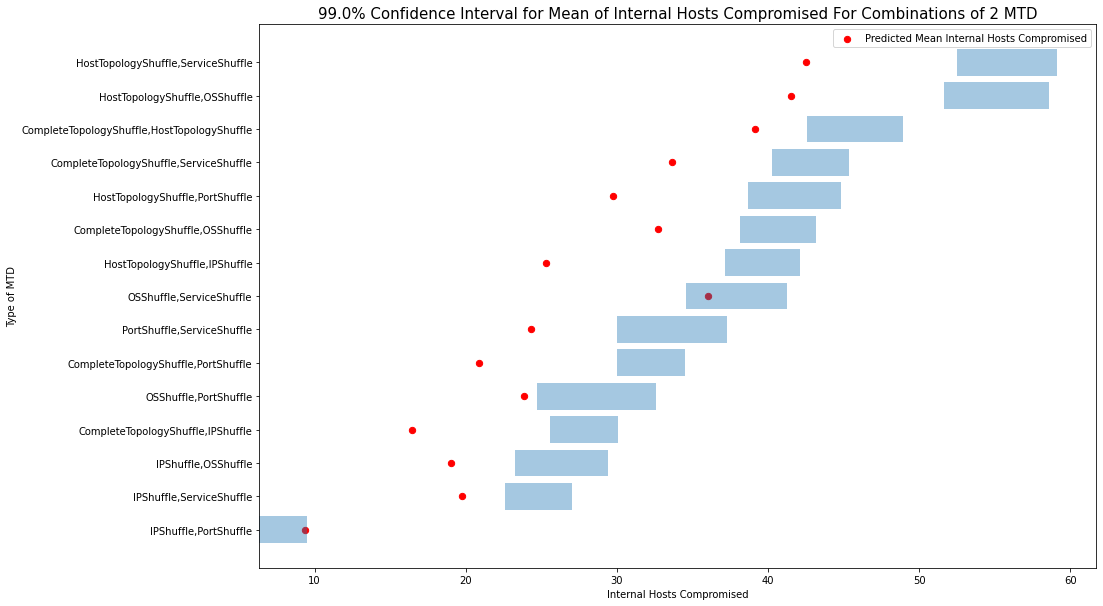

In [98]:
filter_list = [
    "NoMTD",
    "IPShuffle",
    "PortShuffle",
    "CompleteTopologyShuffle",
    "HostTopologyShuffle",
    "ServiceShuffle",
    "OSShuffle"
]

only2combinations_df, mtd_stats = compare_confidence_intervals(combination2_results, mtd_model_params=all_mtd_params, filter_mtd=filter_list, plot_predict= True)

In [107]:
def test_stastic(df, mtd_statistcs):
    test_stastic_list = []
    
    for mtd_stat in mtd_statistcs:
        mtd_type = mtd_stat[0]
        if len(mtd_type.split(',')) != 3:
            continue
        mtd_mean = float(mtd_stat[3])
        
        mtd_predicted_mean = float(mtd_stat[4])
        test_stat = (mtd_mean - mtd_predicted_mean)/standard_deviation_for_mean_compromised_internal_hosts(df, mtd_type)
        
        test_dict = {
            "\\textbf{MTD Combination}" : mtd_type,
            "$H_M(t_{max})$" : mtd_mean,
            "$\hat{H}_M(t_{max})$" : mtd_predicted_mean,
            "$Z_M$ " : test_stat,
            "\\textbf{Rejected $H_0$}" : test_stat > 2.576 or test_stat < -2.576
        }
        
        test_stastic_list.append(test_dict)
    return pd.DataFrame(test_stastic_list)

In [93]:
test_stastic_df = test_stastic(only2combinations_df, mtd_stats)
test_stastic_df = test_stastic_df.round(decimals=2)
test_stastic_df

,\textbf{MTD Combination},$H_M(t_{max})$,$\hat{H}_M(t_{max})$,$Z_M$,\textbf{Rejected $H_0$}
0,"IPShuffle,PortShuffle",7.91,9.35,-2.44,False
1,"IPShuffle,ServiceShuffle",24.81,19.75,6.00,True
2,"IPShuffle,OSShuffle",26.35,19.02,6.30,True
3,"CompleteTopologyShuffle,IPShuffle",27.82,16.46,13.45,True
4,"OSShuffle,PortShuffle",28.63,23.86,3.20,True
5,"CompleteTopologyShuffle,PortShuffle",32.27,20.90,13.45,True
6,"PortShuffle,ServiceShuffle",33.63,24.30,6.74,True
7,"OSShuffle,ServiceShuffle",37.91,36.03,1.47,False
8,"HostTopologyShuffle,IPShuffle",39.62,25.29,15.26,True
9,"CompleteTopologyShuffle,OSShuffle",40.64,32.69,8.36,True


In [94]:
test_stastic_df.to_csv("results/teststastic_2combinations.csv", index=False)

In [100]:
combined_df = pd.concat([combination2_results, combination3_results])

MTD: NoMTD PREDICTED: 14.527769092863405 14.6
MTD: HostTopologyShuffle PREDICTED: 48.71 48.71
MTD: OSShuffle PREDICTED: 35.48 35.48
MTD: IPShuffle PREDICTED: 6.33 6.33
MTD: PortShuffle PREDICTED: 13.0 13.0
MTD: ServiceShuffle PREDICTED: 36.39 36.39
MTD: CompleteTopologyShuffle PREDICTED: 30.23000000000001 30.23
MTD: CompleteTopologyShuffle,IPShuffle,PortShuffle PREDICTED: 14.798176424571754 27.76
MTD: IPShuffle,PortShuffle,ServiceShuffle PREDICTED: 17.27841294628789 25.6
MTD: HostTopologyShuffle,IPShuffle,PortShuffle PREDICTED: 20.297244248428626 36.58
MTD: IPShuffle,OSShuffle,PortShuffle PREDICTED: 17.52467975863693 22.95


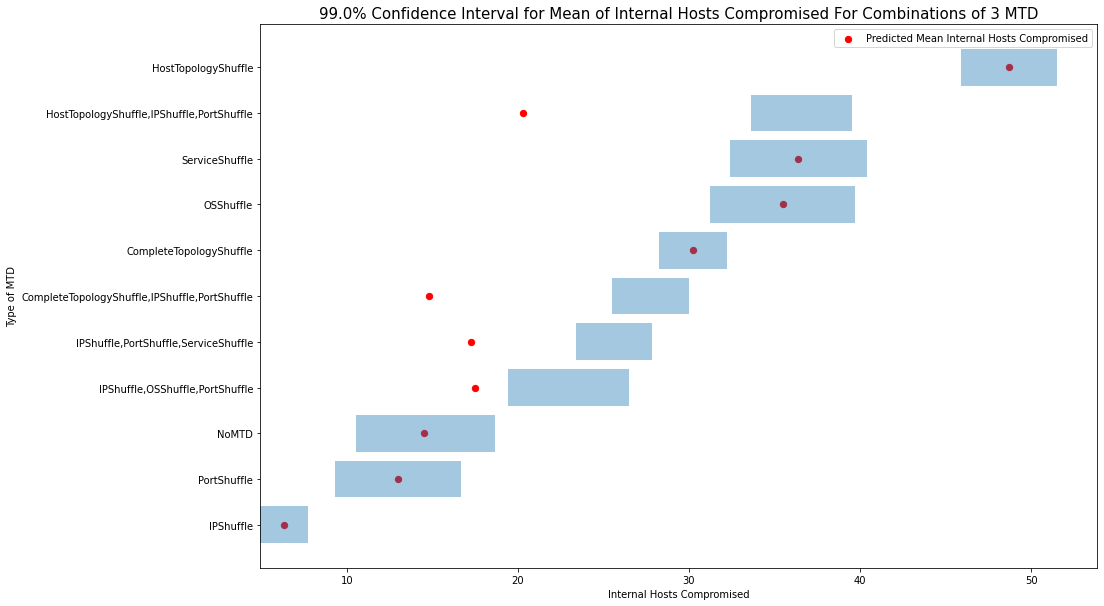

In [111]:
only3combinations_df, mtd_stats = compare_confidence_intervals(combined_df, mtd_model_params=all_mtd_params, filter_mtd=filter_list, plot_predict= True)

In [112]:
test_stastic_df = test_stastic(only3combinations_df, mtd_stats)
test_stastic_df = test_stastic_df.round(decimals=2)
test_stastic_df

,\textbf{MTD Combination},$H_M(t_{max})$,$\hat{H}_M(t_{max})$,$Z_M$,\textbf{Rejected $H_0$}
0,"IPShuffle,OSShuffle,PortShuffle",22.95,17.52,4.06,True
1,"IPShuffle,PortShuffle,ServiceShuffle",25.60,17.28,9.95,True
2,"CompleteTopologyShuffle,IPShuffle,PortShuffle",27.76,14.80,15.19,True
3,"HostTopologyShuffle,IPShuffle,PortShuffle",36.58,20.30,14.62,True


In [113]:
test_stastic_df.to_csv("results/3combinationtestindependence.csv", index=False)

In [34]:
AVG_TIME_NEXT_CHANGE_1_STRAT = 3000

def mtd_model(time, mtd_params, df, time_penalty_coefficient):
    total_strats = len(mtd_params)
    avg_time_to_next_change = AVG_TIME_NEXT_CHANGE_1_STRAT*total_strats
    
    full_time = np.array([i for i in range(250000)])
    n_t_values = log_model(full_time, 9.42, 1.47e-05)
    
    n_t_next = n_t_values[avg_time_to_next_change]
    
    estimated_h = []
    previous_penalities = {}
    previous_blocks = {}
    for t in time:
        t = int(t)
        new_vectors_factor = 0
        total_mtd_effectiveness = 0
        
        for mtd_param in mtd_params:
            b_m = get_average_blocks(df, mtd_param["name"], t)
            
            m_pen = get_penalty(b_m)
            previous_pen = previous_penalities.get(mtd_param["name"], m_pen)
            b_m_previous = previous_blocks.get(mtd_param["name"], b_m)
            
            new_vectors_factor += mtd_param["n_m"] * b_m * n_t_next
            total_mtd_effectiveness += time_penalty_coefficient*(m_pen - previous_pen) + (b_m - b_m_previous) * mtd_param["e"]
            previous_penalities[mtd_param["name"]] = m_pen
            
        estimated_h.append(new_vectors_factor + n_t_values[t] - total_mtd_effectiveness)
        
    return np.array(estimated_h)
    
    
# def log_model(time, a, b):
#     return a*np.log(b*time + 1)
# parameters, covariance = curve_fit(log_model, avg_no_mtd[0,:], avg_no_mtd[1,:])

def ipshuffle_mtd_fit_curve_model_no_n_m(time, e, time_penalty_coefficient):
    mtd_params = [{
        "name" : "IPShuffle",
        "n_m" : 0,
        "e" : e,
        "avg_time_series" : ipshuffle[1,:]
    }]
    
    return mtd_model(time, mtd_params, combination2_results, time_penalty_coefficient)

def expected_mtd_values(model_times, mtd_np):
    expected = []
    for t in model_times:
        t = int(t)
        expected.append(mtd_np[1,:][t])
        
    return expected

model_times = [t for t in np.arange(avg_no_mtd[0,:][0], avg_no_mtd[0,:][-1], 2500)]
expected_ipshuffle = expected_mtd_values(model_times, ipshuffle)
e_time_coeffiecient_parameters, e_time_coeffiecient_covariance = curve_fit(ipshuffle_mtd_fit_curve_model_no_n_m, model_times, expected_ipshuffle)

/home/alex/Desktop/ResearchProject/DemoSimulation/venv/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [138]:
e_time_coeffiecient_parameters

array([ 1.        , -0.89961769])

In [139]:
time = avg_no_mtd[0,:]
print(time[0])
ipshuffle_model = mtd_model(model_times, [ipshuffle_params], combination2_results,-0.89961769)
portshuffle_mode = mtd_model(model_times, [portshuffle_params], combination2_results,1)

0.0


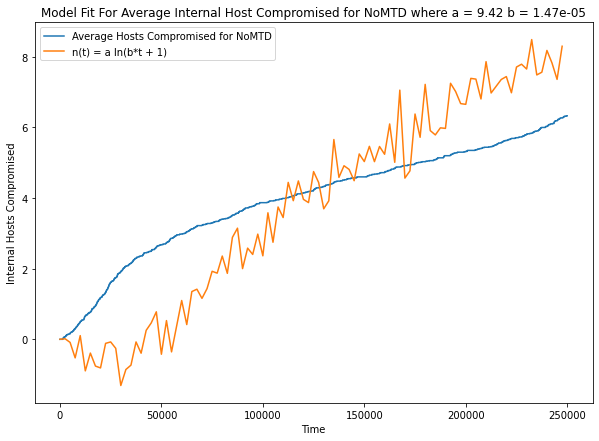

In [140]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(ipshuffle[0,:], ipshuffle[1,:])
ax.plot(model_times, ipshuffle_model)
ax.legend(["Average Hosts Compromised for NoMTD", "n(t) = a ln(b*t + 1)"])
ax.set_xlabel("Time")
ax.set_ylabel("Internal Hosts Compromised")
ax.set_title("Model Fit For Average Internal Host Compromised for NoMTD where a = {} b = {}".format(9.42, 1.47e-05))
plt.show()